In [117]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from scipy import ndimage, misc
import numpy as np
from math import sqrt

In [118]:
matrix = np.ones((10, 10))
matrix *= -1
matrix[0][5:6] = 7
matrix[1][5:7] = 7
matrix[2][5:8] = 7
matrix[3][5:9] = 7
matrix[4][5:10] = 7
matrix[5][5:10] = 7
matrix[6][5:9] = 7
matrix[7][5:8] = 7
matrix[8][5:7] = 7
matrix[9][5:6] = 7
matrix

array([[-1., -1., -1., -1., -1.,  7., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  7.,  7., -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  7.,  7.,  7., -1., -1.],
       [-1., -1., -1., -1., -1.,  7.,  7.,  7.,  7., -1.],
       [-1., -1., -1., -1., -1.,  7.,  7.,  7.,  7.,  7.],
       [-1., -1., -1., -1., -1.,  7.,  7.,  7.,  7.,  7.],
       [-1., -1., -1., -1., -1.,  7.,  7.,  7.,  7., -1.],
       [-1., -1., -1., -1., -1.,  7.,  7.,  7., -1., -1.],
       [-1., -1., -1., -1., -1.,  7.,  7., -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  7., -1., -1., -1., -1.]])

In [119]:
def trans_paste(backgound,foreground,box=(0,0)):
    foreground_trans = Image.new("RGBA",backgound.size)
    foreground_trans.paste(foreground,box,mask=foreground)
    new_img = Image.alpha_composite(backgound,foreground_trans)
    return new_img

In [120]:
# Load image:
input_image = Image.open("test2.png").convert("RGBA")
input_pixels = input_image.load()
width, height = input_image.width, input_image.height


In [121]:
# Make grayscaled
gray = input_image.copy()
gray_drawer = ImageDraw.Draw(gray)
for x in range(width):
    for y in range(height):
        av = int((input_pixels[x, y][0] + input_pixels[x, y][1] + input_pixels[x, y][2]) / 3)
        gray_drawer.point((x, y), (av, av, av))
gray_pixels = gray.load()
gray_arr = np.array([[gray_pixels[x, y][0] for x in range(width)] for y in range(height)])

# Convolution
result = ndimage.convolve(gray_arr, matrix, mode='constant', cval=0)
result = result.transpose()

In [122]:
# Create output image
result2 = np.zeros(result.shape)
for x in range(width):
    for y in range(height):
        if result[x,y] > 0:
            result2[x,y] = 1
            
output_image = Image.new("RGBA", input_image.size)
output_image.paste( (60,200,30), (0,0,output_image.size[0],output_image.size[1]))
romb = Image.open("mask.png").convert("RGBA")
for x in range(width):
    for y in range(height):
        if result2[x,y] == 0:
            output_image = trans_paste(output_image,romb,box=(x,y))

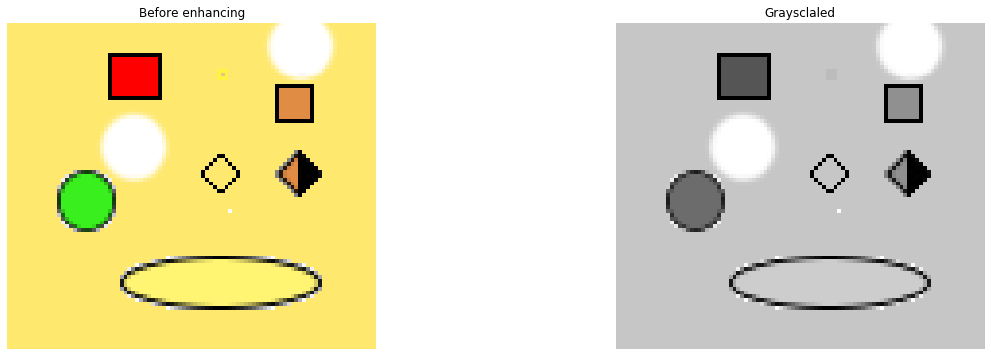

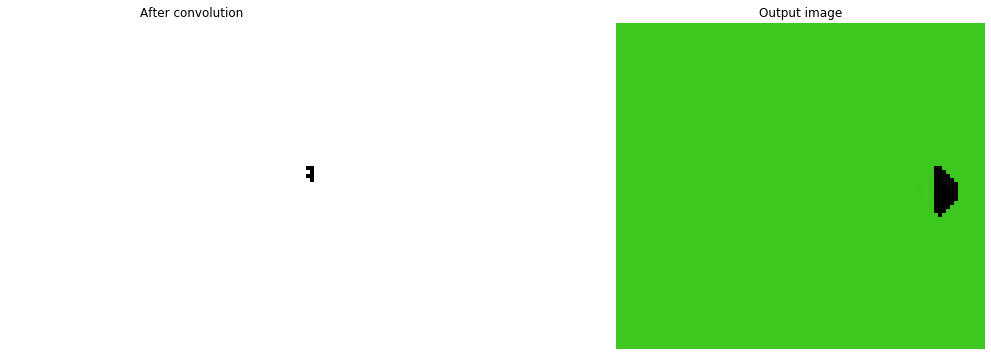

In [123]:
# Plotting output images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title('Before enhancing')
ax1.axis('off')
ax2.set_title('Graysclaled')
ax2.axis('off')
ax3.set_title('After convolution')
ax3.axis('off')
ax4.set_title('Output image')
ax4.axis('off')

ax1.imshow(input_image)
ax2.imshow(gray)
ax3.imshow(result2.T , cmap="gray")
ax4.imshow(output_image)
    
output_image.save("edges.png")